# ELE510 Image Processing with robot vision: LAB, Exercise 5, Frequency-domain processing.

### Daniel Fylling

## Abstract

In this exercise, we look at the Discrete Fourier Transform (DFT) and its practical application to image processing. We begin by investigating the one-dimensional DFT and its inverse, gaining insights into the DC-component and how to calculate the transform by hand. 

Next, we look at two-dimensional DFTs for grayscale images, and display the magnitude and phase components in the frequency domain. We quickly study the effects of shifting and zero-meaning images on their DFT representations and we see the value of scaling for display purposes.

Further, we experiment with combining DFT magnitudes and phases from two different images, leading to intriguing and somewhat unexpected results. We discover that modifying the phase while keeping the magnitude constant can give a surprising effect.

Lastly, we apply ideal filters in the frequency domain to selectively remove high and low-frequency components from images. We observe the impact on the spatial domain images, resulting in a smoothed image and keeping only details, respectively.

## Problem 1

The Fourier Transform is separable, that means that the two-dimensional transform is a sequence of two one-dimensional transforms. 
For images this can be considered as a transform along rows followed by a transform along columns (note that the input to the second step is the result from the first step, i.e. an image where the rows represents frequency and the columns space, $F(f_{x},y)$). 
To get a better understanding of the **DFT** it is therefore convenient to study the one-dimensional transform:

\begin{equation}
    G(k) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}}, \qquad k = 0, 1, 2, \;\cdots\;,(w-1),
\end{equation}

and its inverse, **IDFT**:

\begin{equation}\
    g(x) = \frac{1}{w}\sum_{k=0}^{w-1} G(k)e^{j2\pi\frac{kx}{w}}, \qquad  x = 0, 1, 2,\;\cdots\;,(w-1).
\end{equation}

One period of the signal is $g(x),\, x = 0, 1, 2,\;\cdots\;,(w-1)$ and in the frequency domain $F(k),\, k = 0, 1, 2, \;\cdots\;,(w-1)$.

**a)** Find the DC-component, $G(0)$. What does $\frac{G(0)}{w}$ represent?

Finding DC-component:
$$
\begin{equation}
    G(0) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{0x}{w}} = \sum_{x=0}^{w-1} g(x)
\end{equation}
$$

$\frac{G(0)}{w}$ represents the mean of $g(x)$. The value represents the average brightness of the image. This makes sense as all other frequencies integrate to zero across longer spans. Again this means that in order to elevate the average brightness / pixel value of an image above zero - a DC component is needed.

**b)** Show that the DFT is periodic, i.e. $G(k) = G(k+l\cdot w)$, where $l$ is an arbitrary integer.


$$
\begin{equation}
    G(k+l\cdot w) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{(k+l\cdot w)x}{w}} = \sum_{x=0}^{w-1} g(x)[cos(2\pi\frac{(k+l\cdot w)x}{w})-jsin(2\pi\frac{(k+l\cdot w)x}{w})]
\end{equation}
$$

From this formula we see that for any value of $l$ the result will be the same due to the cyclic nature of $sin(x)$ and $cos(x)$. We can also notice that the irrational term is allways zero since k, l, x and w are all integers and $sin(2\pi k)=0$.

**c)** Find $G(k)$ for the centered box-function with 5 non-zero samples, $w = 16$.
\begin{equation}
    g(x)  =
    \begin{cases}
          1  \qquad \text{for} \qquad   x = 0, 1, 2\;\text{and}\;14,15. \\
          0   \qquad \text{otherwise,}
    \end{cases}
\end{equation}

$$
\begin{equation}
    G(k) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}} = \sum_{x=0}^{w-1} g(x)[\cos(2\pi\frac{kx}{w})-j\sin(2\pi\frac{kx}{w})] = \sum_{x=0}^{w-1} g(x)[\cos(2\pi\frac{kx}{w})
\end{equation} 
$$

$$
\begin{equation}
    G(k) =  \cos(2\pi\frac{k \cdot 0}{16}) +  \cos(2\pi\frac{k \cdot 1}{16}) +  \cos(2\pi\frac{k \cdot 2}{16}) +  \cos(2\pi\frac{k \cdot 14}{16}) +  \cos(2\pi\frac{k \cdot 15}{16})
\end{equation} 
$$

$$
\begin{equation}
    G(k) = 1 + \cos(\pi\frac{k}{8}) + \cos(\pi\frac{k}{4}) + \cos(\pi\frac{7k}{4}) + \cos(\pi\frac{15}{8}) 
\end{equation} 
$$

## Problem 2
**a)**  Use $g(x)$ as defined in **1 c)**, for $x \in [0,15]$. Use  **numpy.fft.fft**  for finding the dft, $G(k)$.  Plot both $g(x)$ and $G(k)$.  Also plot the mathematical solution from probelm c) and see if / how they correspond.  

You can also try to sketch $g(x)$ and $G(k)$ in the index range $-8,-7,\;\cdots\;,-1, 0, 1, 2,\;\cdots\;,7$ (note the periodic property of both functions).  


In [85]:
import os
import matplotlib.pyplot as plt  
import math
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')

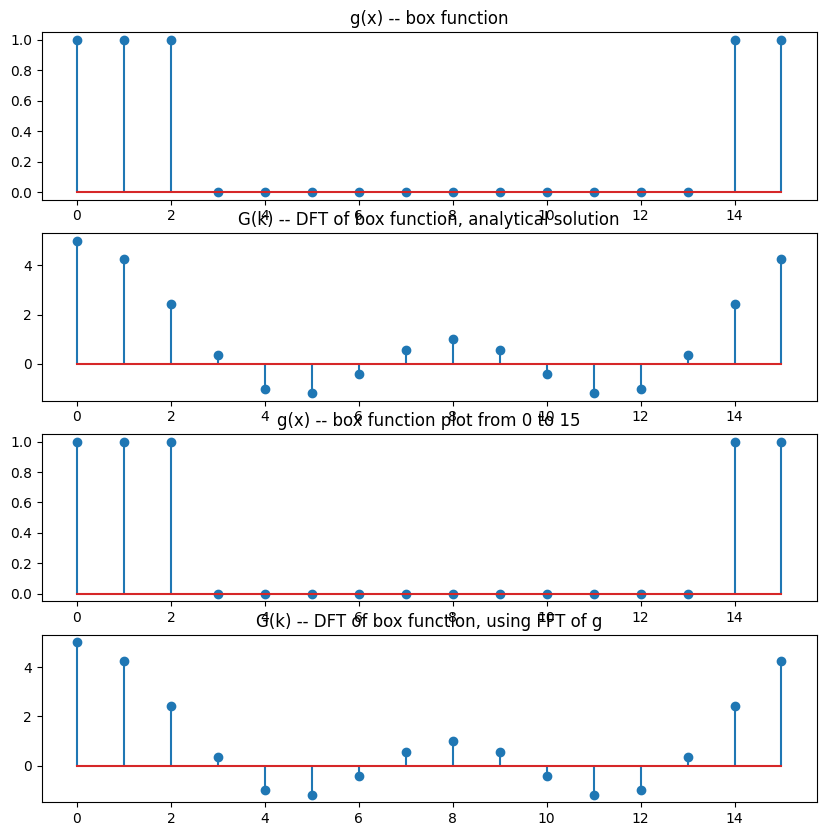

In [86]:
# Both functions are discrete and periodic with period N=16. 
# Note that the DFT of the discrete box function approximates a 
# truncated "sinc" function. The continuous Fourier transform of the
# continuous box function is a "sinc" function with infinite duration.

n = np.arange(16)
f = np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1])

F = 1 + np.cos(np.pi * n * 0.125) + np.cos(np.pi * n * 0.25) \
    + np.cos(np.pi * n * 7 * 0.25) + np.cos(np.pi * n * 15 * 0.125)


# Visualization of the result from the calculations, with zeros in the midle :
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.stem(n,f)
plt.title('g(x) -- box function')
plt.subplot(412)
plt.stem(n,F)
plt.title('G(k) -- DFT of box function, analytical solution')

  
# Calculate DFT with numpy.fft.fft.
g = f
G = np.fft.fft(g)

# Visualization of the results from using numpy.fft.fft.
plt.subplot(413)
plt.stem(g)
plt.title('g(x) -- box function plot from 0 to 15')
plt.subplot(414)
plt.stem(G)
plt.title('G(k) -- DFT of box function, using FFT of g')

plt.show()

In [87]:
F-G

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.33226763e-15+0.j,
        1.66533454e-16+0.j, -2.66453526e-15+0.j, -2.22044605e-16+0.j,
       -8.88178420e-16+0.j,  3.10862447e-15+0.j,  0.00000000e+00+0.j,
        2.33146835e-15+0.j, -1.38777878e-15+0.j,  2.66453526e-15+0.j,
        7.77156117e-16+0.j, -1.33226763e-14+0.j,  7.10542736e-15+0.j,
        1.06581410e-14+0.j])

**Observations:**
1. From the graphs we see that the analytic solution and np.fft.fft look very similar.
2. The calculation `F-G` confirms this. We see that these outputs are practically identical, with only machine error separating them.
3. `F-G` also shows that the output is in irrational form, but that the irrational component here is zero, just as was found while deriving the analytic formula.

## Problem 3

**a)**   
In **Problem 2** the DFT (fft) was real - by coincidence.   In general it is complex.   In this part we will take in an image and look at it in space-domain (the image itself) and in frequency domain looking at just **the magnitude** of the DFT.  
Useful functions :  **numpy.fft.fft2** ,  **numpy.fft.fftshift** .  
Import an image as a grayscale image.  It can be your own image for fun (or just do soapbubbles.png).  Fill inn the cell below, finding a zero mean version of the image and the DFT of both the image and the zero mean image.



In [88]:
# Import an image I as grayscale 
imagepath = './images/soapbubbles.png'
I = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)

#Remove the mean from the image I, make the zero mean image Iz.  
Iz = I - np.mean(I)

# Compute the 2D DFT of the image I and the zero-mean image Izm.  Shift so that the zero-frequency component is at the center of the image.
# se np.fft.fftshift 

DFT_I = np.fft.fft2(I)
DFT_SHIFT_I = np.fft.fftshift(DFT_I)
DFT_Iz = np.fft.fft2(Iz)
DFT_SHIFT_Iz = np.fft.fftshift(DFT_Iz)

**b)**  
Now you will find the magnitude of the DFT of I and Iz.  You are going to make a plot where you plot the image at the top, one row with the magnitude directly of I and Iz, and another where we do the scaling we do for display purposes as we talked about in class using the logarithm of the logarithm(1+magnitude(DFT)) .  

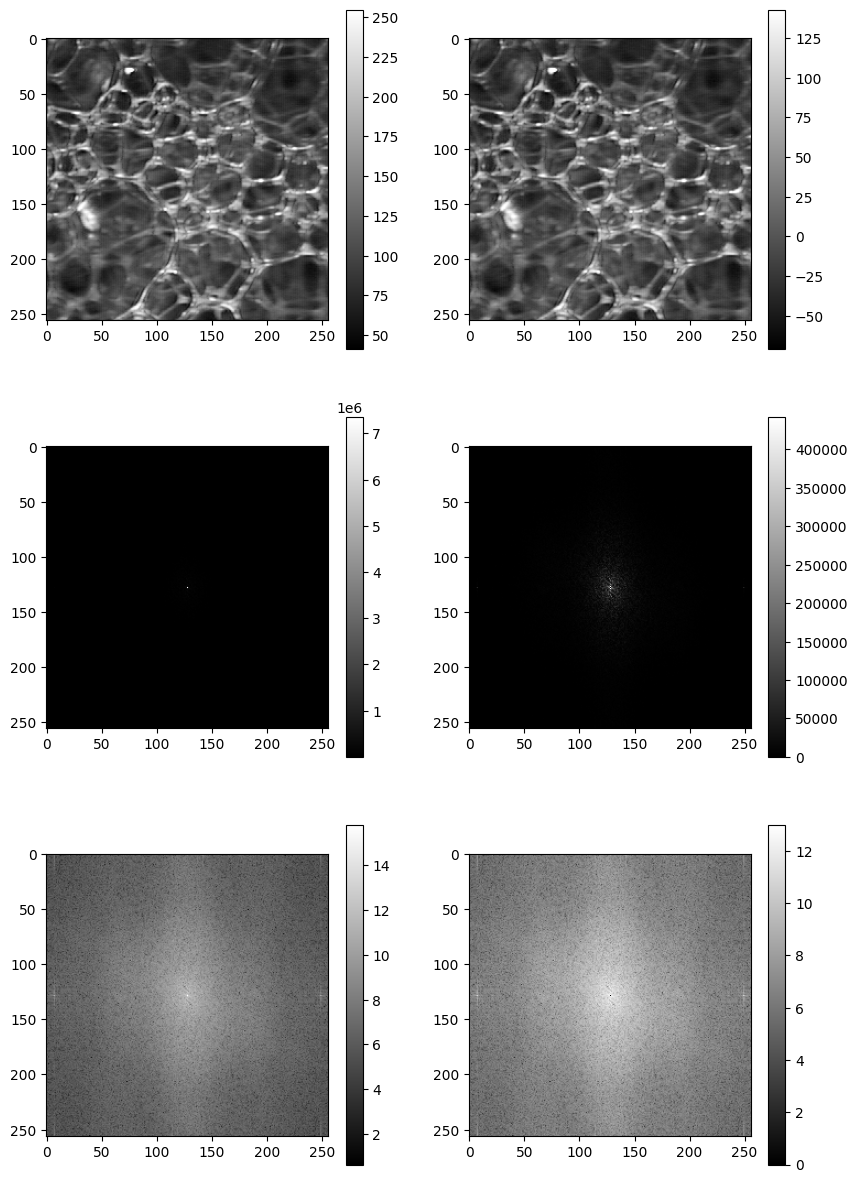

In [89]:
# Finding magnitudes of DFTs
DFT_SHIFT_I_mag = np.abs(DFT_SHIFT_I)
DFT_SHIFT_Iz_mag = np.abs(DFT_SHIFT_Iz)

# plot here
plt.figure(figsize=(10,15))
plt.subplot(321)
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.subplot(323)
plt.imshow(DFT_SHIFT_I_mag, cmap='gray')
plt.colorbar()
plt.subplot(325)
plt.imshow(np.log(DFT_SHIFT_I_mag + 1), cmap='gray')
plt.colorbar()

plt.subplot(322)
plt.imshow(Iz, cmap='gray')
plt.colorbar()
plt.subplot(324)
plt.imshow(DFT_SHIFT_Iz_mag, cmap='gray')
plt.colorbar()
plt.subplot(326)
plt.imshow(np.log(DFT_SHIFT_Iz_mag + 1), cmap='gray')
plt.colorbar()

plt.show()


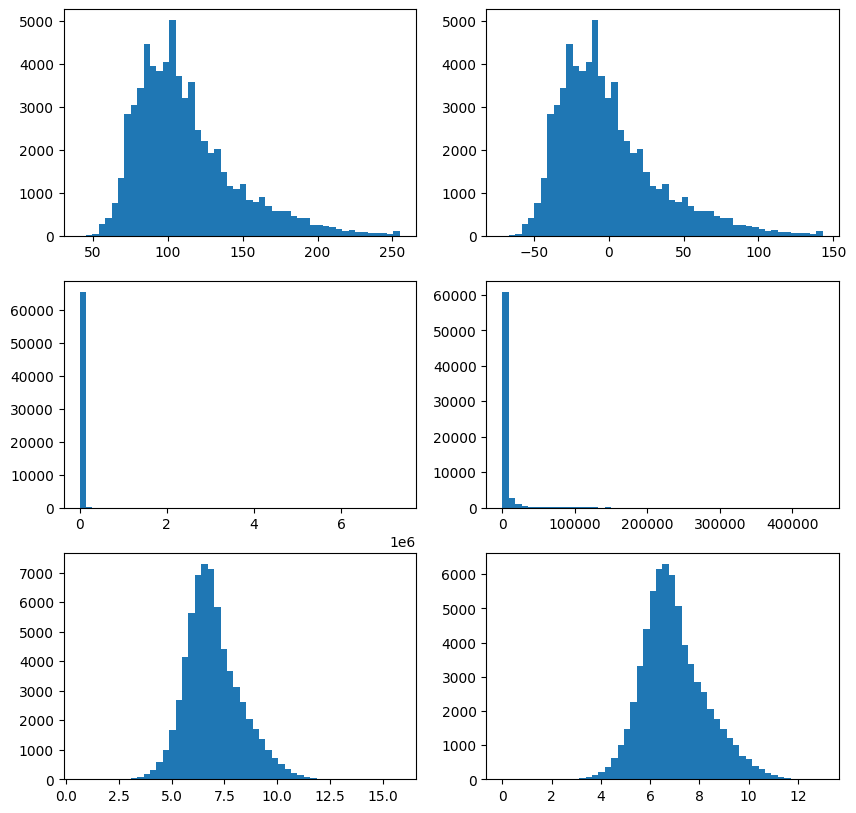

In [90]:
# Plotting histograms of corresponding images above
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.hist(I.flatten() , bins = 50 )
plt.subplot(323)
plt.hist(DFT_SHIFT_I_mag.flatten() , bins = 50 )
plt.subplot(325)
plt.hist(np.log(DFT_SHIFT_I_mag + 1).flatten() , bins = 50 )

plt.subplot(322)
plt.hist(Iz.flatten() , bins = 50 )
plt.subplot(324)
plt.hist(DFT_SHIFT_Iz_mag.flatten() , bins = 50 )
plt.subplot(326)
plt.hist(np.log(DFT_SHIFT_Iz_mag + 1).flatten() , bins = 50 )

plt.show()

**c)** Comment on both the difference we see on the magnitude for I and Iz as well as with and without the scaling  

**Observations:**
1. Images: as the linear grey scale is automatically adjusted the images appear identical. We see the difference only by looking at the colorbars.
2. DFT's: values span a large range so it's no surprise that the linear scale is not able to show the variations very well. We see that the shifted DFT is slightly less biased toward the lower end of the spectrum which shows as a larger bright spot in the middle.
3. Log DFT's: Here the variation of the dataset is obsrevable to a much higher degree. Difference between the original and the shifted image is less, with the shifted image being slightly brighter. How this observation is actually linked to shifting the image mean to zero, I can not see directly. 
    - From the histogram of log(magnitude) we can confirm that the span of values cover 10 (ln) magnitudes, which would be difficult to meaningfully represent on a linear scale.

## Problem 4

**a)**  
Now we will consider both the magnitude and the phase.  Lets input two images convert to DFT and see we get the image back doing IDFT.  Also convert to DFT and switch the phase between the images before IDFT and look at the results.  

In [91]:
class I_DFT:
    """
    Takes a gray-scal image as input and calculates various DFT related values 
    to be used for plotting
    """

    def __init__(self, I):

        # Read the grayscale image
        self.I = I

        # Compute the 2D DFT of the image
        self.DFT = np.fft.fft2(self.I)

        # Shift the zero-frequency component to the center
        self.DFT_SHIFT = np.fft.fftshift(self.DFT)

        # Get the magnitude and phase
        self.DFT_SHIFT_mag = np.abs(self.DFT_SHIFT)
        self.DFT_SHIFT_phase = np.angle(self.DFT_SHIFT)

        # Get the unshifted magnitude and phase
        self.DFT_mag = np.abs(self.DFT)
        self.DFT_phase = np.angle(self.DFT)


def I_R(DFT_mag, DFT_phase, SHIFT = False):
    # Reconstructs image from input magnitude and phase
    DFT_R = DFT_mag * np.exp(1j * DFT_phase)
    if SHIFT == False:
        reconstruct = np.real(np.fft.ifft2(DFT_R))
    else:
        reconstruct = np.real(np.fft.ifft2(np.fft.ifftshift(DFT_R)))
    return reconstruct

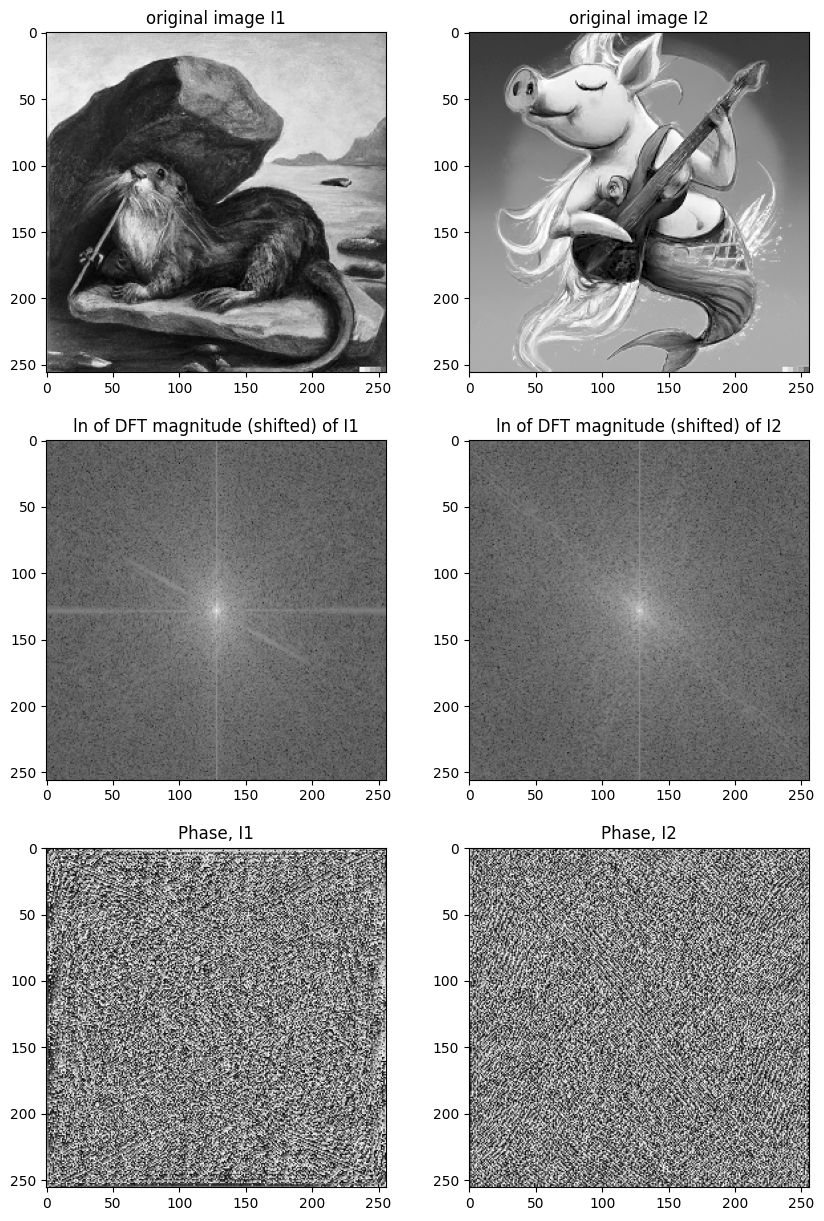

In [92]:
# Here: find fft , and plot images, magnitude plots and phase plots.

I1 = cv2.imread('./images/DALLE-seaotter.png', cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread('./images/DALLE-mermaidpig.png', cv2.IMREAD_GRAYSCALE)


# insert code
Instance1 = I_DFT(I1)
Instance2 = I_DFT(I2)

# fill out the missing:

plt.figure(figsize=(10,15))
plt.subplot(321)
plt.imshow(I1, cmap="gray")
plt.title('original image I1')
plt.subplot(322)
plt.imshow(I2, cmap="gray")
plt.title('original image I2')
plt.subplot(323),
plt.imshow( np.log(Instance1.DFT_SHIFT_mag) ,cmap="gray")
plt.title('ln of DFT magnitude (shifted) of I1')
plt.subplot(324),
plt.imshow( np.log(Instance2.DFT_SHIFT_mag) ,cmap="gray")
plt.title('ln of DFT magnitude (shifted) of I2')
plt.subplot(325)
plt.imshow( Instance1.DFT_phase,cmap="gray")
plt.title('Phase, I1')
plt.subplot(326),
plt.imshow( Instance2.DFT_phase,cmap="gray")
plt.title('Phase, I2')
plt.show()

**Comments:**
1. The images being used were generated using DALL·E, https://labs.openai.com/, using following prompts:
    - Study for the sea otter of the Rocks, by Leonardo da Vinci
    - mermaid pig playing rock music on electric guitar, digital art
2. Chose to present log(DFT_magnitude) rather than just DFT_magnitude for a better viewing experience. 

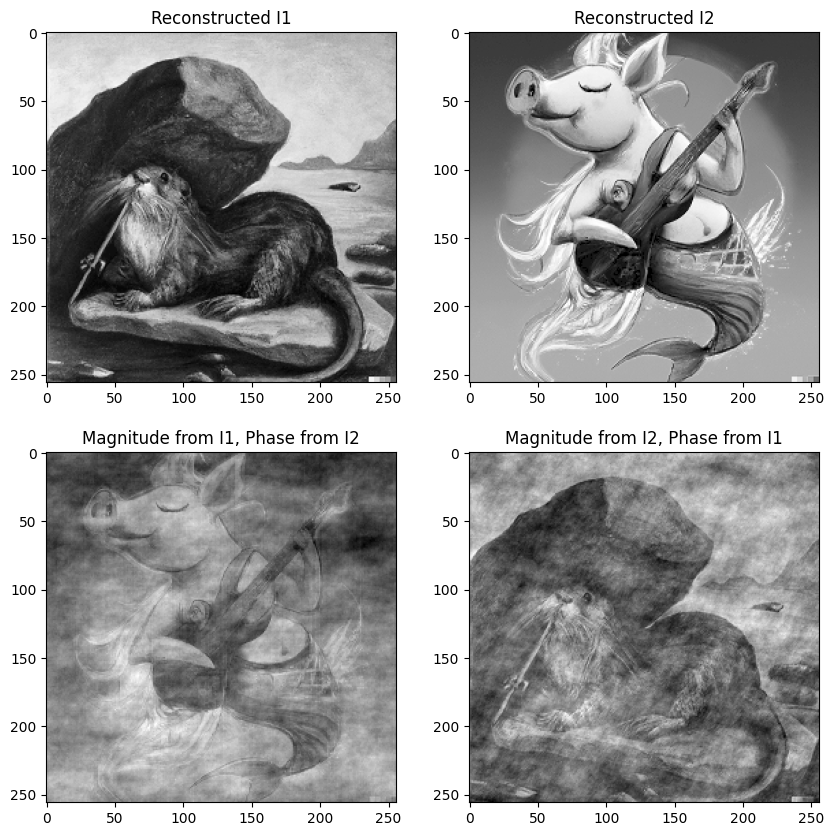

In [93]:
# Use this to find real and imaginary parts of the combined images:
#real_part = magnitude * np.cos(phase)
#imaginary_part = magnitude * np.sin(phase)

#  Splitting up into real and imaginary, putting back together and do IDFT for one image.  Does not change image: 
rec1 = I_R(Instance1.DFT_mag, Instance1.DFT_phase)
rec2 = I_R(Instance2.DFT_mag, Instance2.DFT_phase)

#  Splitting up into real and imaginary using wrong phase, putting back together and do IDFT:  

rec_j1 = I_R(Instance1.DFT_mag, Instance2.DFT_phase)
rec_j2 = I_R(Instance2.DFT_mag, Instance1.DFT_phase)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(rec1,cmap="gray")
plt.title('Reconstructed I1')
plt.subplot(222),
plt.imshow(rec2,cmap="gray")
plt.title('Reconstructed I2')
plt.subplot(223)
plt.imshow(rec_j1,cmap="gray")
plt.title('Magnitude from I1, Phase from I2')
plt.subplot(224),
plt.imshow(rec_j2,cmap="gray")
plt.title('Magnitude from I2, Phase from I1')
plt.show()


**Observations:**
1. The resulting image from combining a different magnitude and phase shows more similarity to its phase-father rather than its magnitude-mother.
    - Based on my intuition this result was not expected.

**b)**   

Take one of the images from the previous section , do the shift so the low frequencies are in the midle of the DFT images.  Thereafter remove low frequencies (high pass filter) or remove high frequencies (loww pass filter) by an ideal filter in the frequency domain.  How can you do that?    Make an image the same size with just ones and zeros.  Let there be zeros in a circle in the midle (for high pass).  How big circle?  That defines the **cutoff-frequency** .  Try different sizes and see.  Use this image as a filter.  Remember convolution (filtering) in space domain is multiplication in the frequency domain.   

**OBS** when transforming back to space domain we might get a complex image since we have tampered with the complex DFT image.  Plot the **magnitude** of the reconstructed image in the space-domain  

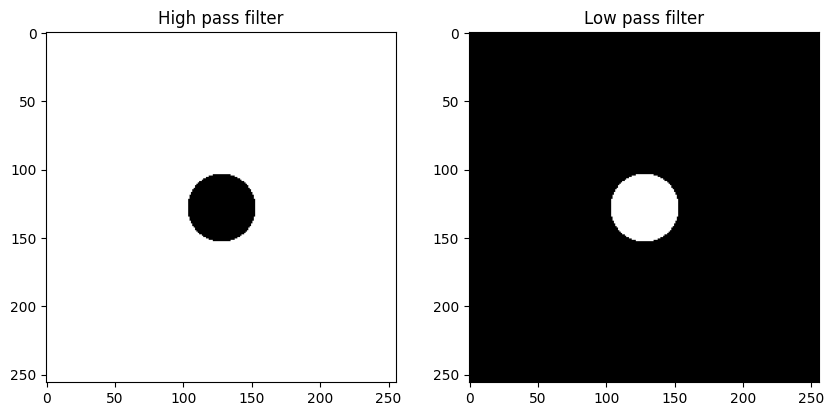

In [94]:
#  Make and plot the ideal filtermask here: 

# initialization: 
high_pass_filter = np.ones_like(I1)
low_pass_filter = np.zeros_like(I1)
rows,cols = I1.shape

cutoff_frequency_hp = 25  # Cutoff frequency in pixels
cutoff_frequency_lp = 25  # Cutoff frequency in pixels

#Create and plot the ideal high-paass filter mask here:
for i in range(rows):
    for j in range(cols):
        if (i-rows*0.5)**2 + (j-cols*0.5)**2 < cutoff_frequency_hp**2:
            high_pass_filter[i,j]=0

for i in range(rows):
    for j in range(cols):
        if (i-rows*0.5)**2 + (j-cols*0.5)**2 < cutoff_frequency_lp**2:
            low_pass_filter[i,j]=1

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(high_pass_filter,cmap="gray")
plt.title('High pass filter')
plt.subplot(222),
plt.imshow(low_pass_filter,cmap="gray")
plt.title('Low pass filter')
plt.show()


**Comments:**
1. While the cutoff frequencies are equal it would also work to write `low_pass_filter = ~high_pass_filter`.
2. The `for`-loop could have been written into a function and called twice rather than copy-pasted and altered.

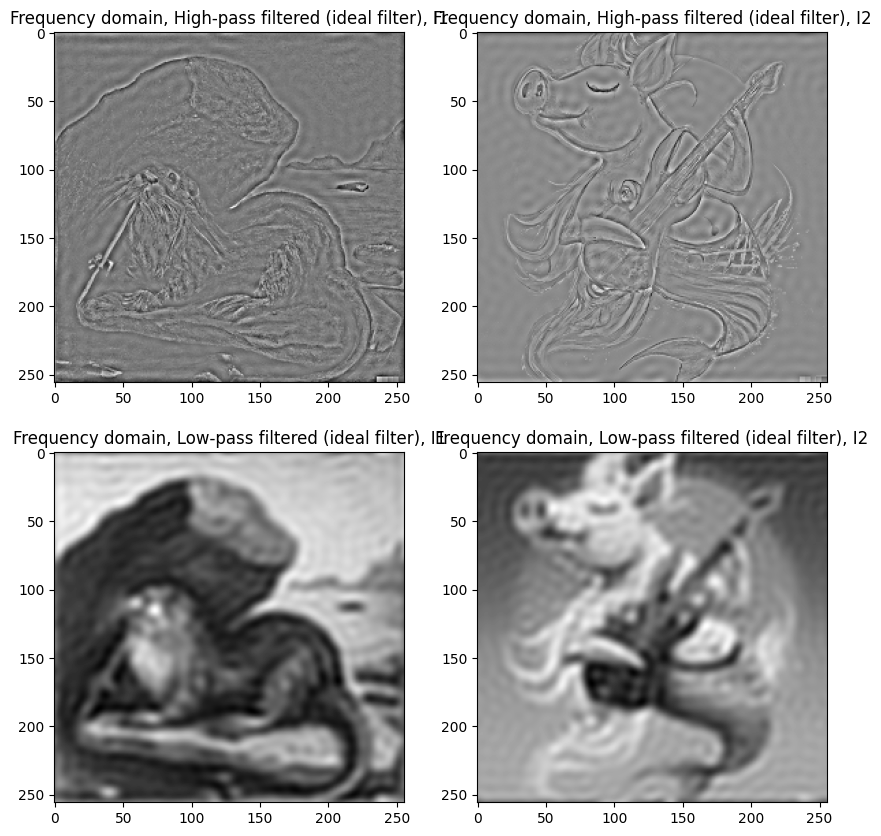

In [95]:
# Use the low-pass filtermask to remove high frequencies 
# and the high-pass filtermask to remove low frequencies in the frequency domain, 
# reconstruct image to the spatial domain and plot it:

I1_HP = I_R(Instance1.DFT_SHIFT_mag*high_pass_filter, Instance1.DFT_SHIFT_phase, SHIFT=True)

I2_HP = I_R(Instance2.DFT_SHIFT_mag*high_pass_filter, Instance2.DFT_SHIFT_phase, SHIFT=True)

I1_LP = I_R(Instance1.DFT_SHIFT_mag*low_pass_filter, Instance1.DFT_SHIFT_phase, SHIFT=True)

I2_LP = I_R(Instance2.DFT_SHIFT_mag*low_pass_filter, Instance2.DFT_SHIFT_phase, SHIFT=True)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(I1_HP,cmap="gray")
plt.title('Frequency domain, High-pass filtered (ideal filter), I1')
plt.subplot(222),
plt.imshow(I2_HP,cmap="gray")
plt.title('Frequency domain, High-pass filtered (ideal filter), I2')
plt.subplot(223)
plt.imshow(I1_LP,cmap="gray")
plt.title('Frequency domain, Low-pass filtered (ideal filter), I1')
plt.subplot(224),
plt.imshow(I2_LP,cmap="gray")
plt.title('Frequency domain, Low-pass filtered (ideal filter), I2')
plt.show()

**Observations:**
1. High pass filter only retains high-detail features of the original image, while the low pass filter resembles a smoothing filter in spatial domain. 
2. Ripples are observed in both images, apparently at similar wavelengths.
    - This makes sense as these two images added together would become the original image. The waves would cancel each other out, similar to destructive interferrence and create a smoother resulting image.
3. From playing around with the cutoff frequency it could be seen that the wavelength of the ripples increase as the cutoff is lowered.
    - This makes sense due to wavelenght and frequency are inversely proportional by definition.